In [3]:
import pandas as pd

In [4]:
from pandas import Series, DataFrame

In [5]:
import numpy as np

In [6]:
import matplotlib.pyplot as plt

In [7]:
import seaborn as sns

In [8]:
sns.set_style("whitegrid")

In [9]:
%matplotlib inline

In [10]:
from sklearn.datasets import load_boston

In [11]:
'''
This project uses a toy dataset that is built into scikit-learn as a way to learn more 
about supervised learning. Specifically, the project provides practice for diving into 
linear regression in a hands-on way. This will be done by using the fit method to train 
the regressor and also using the predict method to predict new labels.

The project uses [the UC Irvine/StatLib/Carnegie Mellon University’s Boston “Housing Data 
Set”](https://archive.ics.uci.edu/ml/datasets/Housing). That dataset was imported just above.

To load the dataset below, an object will be made called “boston” and it will be set equal 
to the imported dataset.
'''

'\nThis project uses a toy dataset that is built into scikit-learn as a way to learn more \nabout supervised learning. Specifically, the project provides practice for diving into \nlinear regression in a hands-on way. This will be done by using the fit method to train \nthe regressor and also using the predict method to predict new labels.\n\nThe project uses [the UC Irvine/StatLib/Carnegie Mellon University’s Boston “Housing Data \nSet”](https://archive.ics.uci.edu/ml/datasets/Housing). That dataset was imported just above.\n\nTo load the dataset below, an object will be made called “boston” and it will be set equal \nto the imported dataset.\n'

In [12]:
boston = load_boston()

In [13]:
'''
It is possible to use the special describe method (boston.DESCR) that scikit-learn built 
into this dataset to see what the dataset contains. That will be done below.
'''

'\nIt is possible to use the special describe method (boston.DESCR) that scikit-learn built \ninto this dataset to see what the dataset contains. That will be done below.\n'

In [14]:
print (boston.DESCR) # The median value will be treated as the target/label. 

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [15]:
'''
A histogram with the target/label of the dataset (median home value) will be plotted below. 
The histogram will be made by calling the target method. 50 bins will be allotted because 
the dataset contains 506 different housing instances.

Being able to call a target value simply by calling the target method is something that is 
easily allowed for when working with toy datasets in scikit-learn. However, it’s not the 
standard way of being able to plot a histogram - it is understood that this is a shortcut.
'''

'\nA histogram with the target/label of the dataset (median home value) will be plotted below. \nThe histogram will be made by calling the target method. 50 bins will be allotted because \nthe dataset contains 506 different housing instances.\n\nBeing able to call a target value simply by calling the target method is something that is \neasily allowed for when working with toy datasets in scikit-learn. However, it’s not the \nstandard way of being able to plot a histogram - it is understood that this is a shortcut.\n'

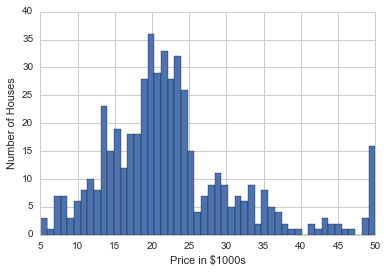

In [16]:
plt.hist(boston.target, bins = 50);

plt.xlabel("Price in $1000s");
plt.ylabel("Number of Houses");

In [17]:
'''
It would be interesting to see a scatterplot of a single feature versus the target/label. 
Next, that will be done by making a scatterplot of the median home value versus the number 
of rooms in the home. 

The dataset provides an attribute that allows for easily getting the number of rooms.  “RM” 
is the label for the average number of rooms per dwelling. All of the attribute information 
was given in order, and the room attribute is the sixth down from the top, so it likely has 
an index number of 5. Calling the column at the #5 index of the Boston dataset should return 
the information needed.

Below, to get started, a scatterplot method will be called in the same way as the above 
histogram was made - via the target method being called on the dataset. Then a request for 
every attribute in the 5th column will be given to serve as the x-axis (the average number 
of rooms). Median home value (“Price in $1000s”) will be along the y-axis.
'''

'\nIt would be interesting to see a scatterplot of a single feature versus the target/label. \nNext, that will be done by making a scatterplot of the median home value versus the number \nof rooms in the home. \n\nThe dataset provides an attribute that allows for easily getting the number of rooms.  “RM” \nis the label for the average number of rooms per dwelling. All of the attribute information \nwas given in order, and the room attribute is the sixth down from the top, so it likely has \nan index number of 5. Calling the column at the #5 index of the Boston dataset should return \nthe information needed.\n\nBelow, to get started, a scatterplot method will be called in the same way as the above \nhistogram was made - via the target method being called on the dataset. Then a request for \nevery attribute in the 5th column will be given to serve as the x-axis (the average number \nof rooms). Median home value (“Price in $1000s”) will be along the y-axis.\n'

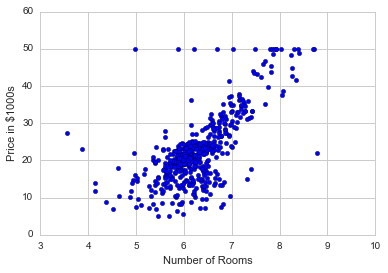

In [18]:
plt.scatter(boston.data[:, 5], boston.target);

plt.ylabel("Price in $1000s");
plt.xlabel("Number of Rooms");

In [19]:
'''
The scatterplot shows a trend - the price increases along with the number of rooms in a house. 
That makes sense considering it is typically the case that more rooms equals a bigger house 
equals likely a greater real estate value. 

Next, the same scatterplot will be replicated by first using Pandas to transform the Boston 
dataset into a DataFrame. And then, Seaborn will be used to perform an lmplot on that DataFrame 
to try to reproduce the scatterplot, but with a linear-fit line included as well.

To begin that, an object will be made called bostonDataFrame. Then, the data will be reset as a 
Pandas DataFrame when the DataFrame method is called on just the data of the Boston dataset, 
not on the actual target/label itself. Calling the DataFrame method in this way is another thing 
that the toy dataset allows for as a way to keep things convenient.
'''

'\nThe scatterplot shows a trend - the price increases along with the number of rooms in a house. \nThat makes sense considering it is typically the case that more rooms equals a bigger house \nequals likely a greater real estate value. \n\nNext, the same scatterplot will be replicated by first using Pandas to transform the Boston \ndataset into a DataFrame. And then, Seaborn will be used to perform an lmplot on that DataFrame \nto try to reproduce the scatterplot, but with a linear-fit line included as well.\n\nTo begin that, an object will be made called bostonDataFrame. Then, the data will be reset as a \nPandas DataFrame when the DataFrame method is called on just the data of the Boston dataset, \nnot on the actual target/label itself. Calling the DataFrame method in this way is another thing \nthat the toy dataset allows for as a way to keep things convenient.\n'

In [20]:
bostonDataFrame = DataFrame(boston.data)

In [21]:
'''
Below, the columns in the DataFrame will be set equal to the feature names method (which is yet 
another thing that the toy dataset allows for).
'''

'\nBelow, the columns in the DataFrame will be set equal to the feature names method (which is yet \nanother thing that the toy dataset allows for).\n'

In [22]:
bostonDataFrame.columns = boston.feature_names

In [23]:
bostonDataFrame.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [24]:
'''
Next, the target/label of the Boston dataset (the median home value, or price) will be added. 
That will be done by creating a new column in the DataFrame and calling it “Price” then 
setting that equal to the target/label of the DataFrame. Setting the target/label will be done 
by passing the target method.
'''

'\nNext, the target/label of the Boston dataset (the median home value, or price) will be added. \nThat will be done by creating a new column in the DataFrame and calling it “Price” then \nsetting that equal to the target/label of the DataFrame. Setting the target/label will be done \nby passing the target method.\n'

In [25]:
bostonDataFrame["Price"] = boston.target

In [26]:
bostonDataFrame.head()  # ... checking for the new "Price" column

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [27]:
'''
Seaborn’s built-in functionality means that it can be used to do a linear fit or linear 
regression automatically. This means not needing to manually calculate out the best fit 
line/least squares line.

Below, the lmplot function will be used to call a linear plot that will create a linear 
regression over the scatterplot. It will plot the room feature versus the median home 
value, and the data will be set as that DataFrame.
'''

'\nSeaborn’s built-in functionality means that it can be used to do a linear fit or linear \nregression automatically. This means not needing to manually calculate out the best fit \nline/least squares line.\n\nBelow, the lmplot function will be used to call a linear plot that will create a linear \nregression over the scatterplot. It will plot the room feature versus the median home \nvalue, and the data will be set as that DataFrame.\n'

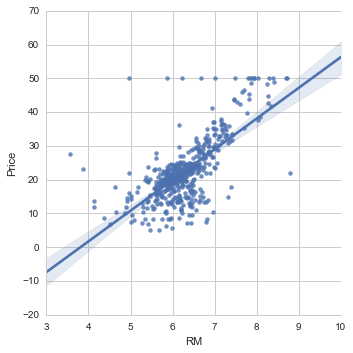

In [28]:
sns.lmplot("RM", "Price", data = bostonDataFrame)

In [48]:
'''
It is possible to manually recreate the above Seaborn plot - it is a simple linear regression. 
Seaborn did that automatically, but it is also possible to use matrix tricks and Numpy’s least 
squares method to achieve the same result. 

So next, Numpy will be used to create a univariate linear regression whereby one data type (number 
of rooms, in this case) will be fit it to another (the average home value data - which is serving 
as the target data/label). To start, the x and y arrays will be set for Numpy to take in. 

An important note for the x array is that Numpy expects to take in a two-dimensional array. The 
first dimension is made up of different example values, and the second dimension is the attribute 
number. In this case, the value will be the mean number of rooms per house. That value is a single 
attribute, so the second dimension of the array will be just 1. All of this means that a (506,1) 
shape array will need to be created (506 because the description of the Boston data set had 506 
attributes for each feature).  

There are a few ways to do this, but an easy way to do this is by using Numpy's built-in vertical 
stack tool - the vstack method.

To begin the algorithmic stuff, X and Y will be set. Said differently, the X and Y being given to 
Numpy will make it possible to use that information to create a single-variable linear regression. 
X will be set to the median of the room value by calling the RM column within the “bostonDataFrame” 
DataFrame). That will simply create a series of all of that column’s data points (or a "(506L,)" ).

'''

'\nIt is possible to manually recreate the above Seaborn plot - it is a simple linear regression. \nSeaborn did that automatically, but it is also possible to use matrix tricks and Numpy’s least \nsquares method to achieve the same result. \n\nSo next, Numpy will be used to create a univariate linear regression whereby one data type (number \nof rooms, in this case) will be fit it to another (the average home value data - which is serving \nas the target data/label). To start, the x and y arrays will be set for Numpy to take in. \n\nAn important note for the x array is that Numpy expects to take in a two-dimensional array. The \nfirst dimension is made up of different example values, and the second dimension is the attribute \nnumber. In this case, the value will be the mean number of rooms per house. That value is a single \nattribute, so the second dimension of the array will be just 1. All of this means that a (506,1) \nshape array will need to be created (506 because the descriptio

In [30]:
X = bostonDataFrame.RM

In [32]:
'''
Numpy’s linear algebra library needs to have the information in a manner where it knows all of the 
features and then how many attributes they actually are. In order to do that below, X will be set 
equal to numpy.vstack to use the vstack method. Then, that vstack method will be called on the RM 
column. Doing that will convert the information into the (506L, 1L) form.
'''

'\nNumpy’s linear algebra library needs to have the information in a manner where it knows all of the \nfeatures and then how many attributes they actually are. In order to do that below, X will be set \nequal to numpy.vstack to use the vstack method. Then, that vstack method will be called on the RM \ncolumn. Doing that will convert the information into the (506L, 1L) form.\n'

In [ ]:
X = np.vstack(bostonDataFrame.RM)

In [33]:
'''
The Y will be set to the label/target - median home value. That set will be made by calling the 
price column that was created earlier. 
'''

'\nThe Y will be set to the label/target - median home value. That set will be made by calling the \nprice column that was created earlier. \n'

In [34]:
Y = bostonDataFrame.Price

In [47]:
'''
“y = mx + b” is the equation for a line. But that equation will need to be rewritten using 
matrices. The equation then ultimately becomes [A = [x  1]](http://docs.scipy.org/doc/numpy-1.3.x/reference/generated/numpy.linalg.lstsq.html).

To use Numpy to start creating that A matrix, a matrix in the form of [X  1] will be needed. 
Every value in the original X that was made above will need to be called. List comprehension 
will be used (instead of a for loop) to make the needed 1 by 2 array ( “[X  1]“).

Below, list comprehension will build a list whereby “for every value in X (so going through 
the x array), set the array up as the ‘value, 1’ “, so that it matches the A = [X  1] matrix. 
Then an array will be made of all of those values. Specifically, "numpy.array" will be used 
to transform the list that was created by list comprehension into an array. Doing this will 
attach the 1 in the [X  1] part of the equation, and that 1 is needed because Numpy needs to 
know how many attributes it will be working with. And, in this case, it’s just a simple, 
single-variable linear regression, so there is just 1 attribute (the average number of rooms). 
'''

'\n“y = mx + b” is the equation for a line. But that equation will need to be rewritten using \nmatrices. The equation then ultimately becomes [A = [x  1]](http://docs.scipy.org/doc/numpy-1.3.x/reference/generated/numpy.linalg.lstsq.html).\n\nTo use Numpy to start creating that A matrix, a matrix in the form of [X  1] will be needed. \nEvery value in the original X that was made above will need to be called. List comprehension \nwill be used (instead of a for loop) to make the needed 1 by 2 array ( “[X  1]“).\n\nBelow, list comprehension will build a list whereby “for every value in X (so going through \nthe x array), set the array up as the ‘value, 1’ “, so that it matches the A = [X  1] matrix. \nThen an array will be made of all of those values. Specifically, "numpy.array" will be used \nto transform the list that was created by list comprehension into an array. Doing this will \nattach the 1 in the [X  1] part of the equation, and that 1 is needed because Numpy needs to \nknow how 

In [37]:
X = np.array( [ [value, 1] for value in X ] )

In [38]:
'''
Having set up the above has provided all that is needed in order to get best fit values. Below, 
two new objects will be set up (m and b) for the best fit line. Then, the least squares method 
(lstsq) from the linear algebra library (linalg) will be used to call the X and Y values to be 
applied to the objects. Only the first indexed value is needed (the value at “[0]”), so that 
will be stated as well so that everything fits the format that the linear algebra least squares 
method spits it out.
'''

'\nHaving set up the above has provided all that is needed in order to get best fit values. Below, \ntwo new objects will be set up (m and b) for the best fit line. Then, the least squares method \n(lstsq) from the linear algebra library (linalg) will be used to call the X and Y values to be \napplied to the objects. Only the first indexed value is needed (the value at “[0]”), so that \nwill be stated as well so that everything fits the format that the linear algebra least squares \nmethod spits it out.\n'

In [39]:
m, b = np.linalg.lstsq(X, Y)[0]

In [40]:
'''
Below, the original format of the Boston information will be used to plot everything together. 
The matrix transformations were only done to make it possible to utilize the Numpy least 
squares method. The code below will create a scatterplot that will make a marker for the 
average number of rooms and the associated median home value.
'''

'\nBelow, the original format of the Boston information will be used to plot everything together. \nThe matrix transformations were only done to make it possible to utilize the Numpy least \nsquares method. The code below will create a scatterplot that will make a marker for the \naverage number of rooms and the associated median home value.\n'

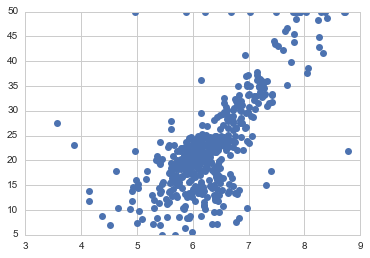

In [41]:
plt.plot(bostonDataFrame.RM, bostonDataFrame.Price, "o")

In [46]:
'''
Below, a yellow best fit line will be plotted. For differentiation, a lower case x will be 
set equal to the room column. Then a plot will be made that uses the x values (the rooms 
column) and the equation of a line whereby the m and b values used are the ones that were 
recently obtained from the Numpy least squares method in the linear algebra library.
'''

'\nBelow, a yellow best fit line will be plotted. For differentiation, a lower case x will be \nset equal to the room column. Then a plot will be made that uses the x values (the rooms \ncolumn) and the equation of a line whereby the m and b values used are the ones that were \nrecently obtained from the Numpy least squares method in the linear algebra library.\n'

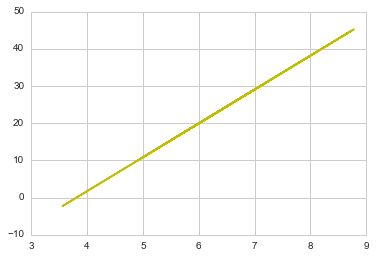

In [45]:
x = bostonDataFrame.RM
plt.plot(x, m*x + b, "y", label = "Best Fit Line")

In [49]:
'''
Below, the two plots will be combined to replicate the Seaborn plot.
'''

'\nBelow, the two plots will be combined to replicate the Seaborn plot.\n'

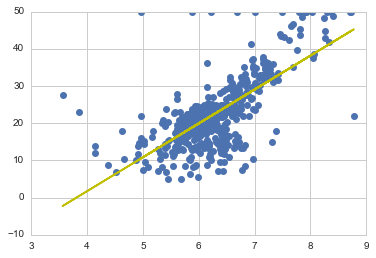

In [50]:
plt.plot(bostonDataFrame.RM, bostonDataFrame.Price, "o");

x = bostonDataFrame.RM
plt.plot(x, m*x + b, "y", label = "Best Fit Line")

In [1]:
'''
Going to try to finish this using lots of markdown instead. Will keep this copy for in case something bad happens.
'''

'\nGoing to try to finish this using lots of markdown instead. Will keep this copy for in case something bad happens.\n'